# **📄 EDA code**


In [1]:
%pip install wandb

  Obtaining dependency information for wandb from https://files.pythonhosted.org/packages/c4/b0/5efefacd9d12b411ebe57c3db6d05a38883cd52e0ff46ca7b217df3151a1/wandb-0.16.3-py3-none-any.whl.metadata
  Obtaining dependency information for GitPython!=3.1.29,>=1.0.0 from https://files.pythonhosted.org/packages/45/c6/a637a7a11d4619957cb95ca195168759a4502991b1b91c13d3203ffc3748/GitPython-3.1.41-py3-none-any.whl.metadata
  Obtaining dependency information for sentry-sdk>=1.0.0 from https://files.pythonhosted.org/packages/ab/5c/b004ae4791f5c5bedab49e2aab2d0b7284fc3ed0f813cb334984f41884cf/sentry_sdk-1.40.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for setproctitle from https://files.pythonhosted.org/packages/79/e7/54b36be02aee8ad573be68f6f46fd62838735c2f007b22df50eb5e13a20d/setproctitle-1.3.3-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for protobuf!=4.21.0,<5,>=3.19.0 from http

In [12]:
import wandb

In [13]:
%wandb login

In [14]:
wandb.init(
    # set the wandb project where this run will be logged
    project="kimhayeon"
)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: haha_ha (aistages-cv-04). Use `wandb login --relogin` to force relogin


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Class Counts:
target
16    100
10    100
0     100
3     100
12    100
8     100
2     100
11    100
7     100
9     100
15    100
5     100
4     100
6     100
13     74
14     50
1      46
Name: count, dtype: int64


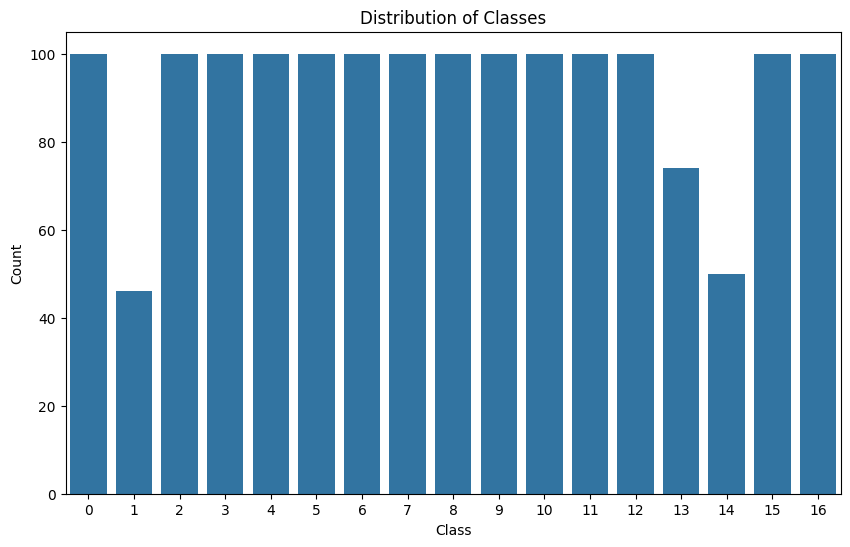

<Figure size 640x480 with 0 Axes>

In [26]:
df = pd.read_csv('/data/ephemeral/home/data/train.csv')

class_counts = df['target'].value_counts()
print("Class Counts:")
print(class_counts)

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='target')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
wandb.log({"Distribution of Classes": wandb.Image(plt)})

In [18]:
import matplotlib.pyplot as plt
from PIL import Image

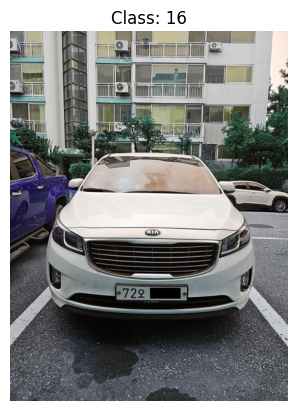

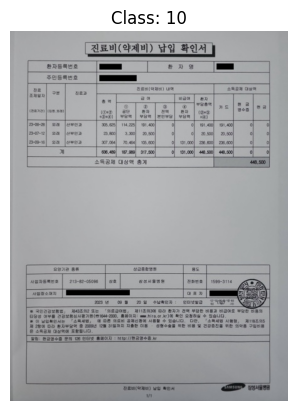

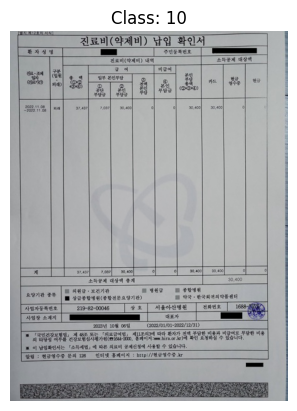

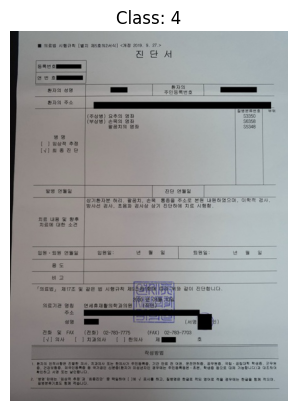

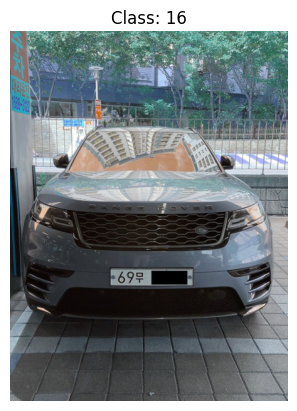

In [19]:
image_path_prefix = "/data/ephemeral/home/data/train/"

for index, row in df.head().iterrows():
    image_path = image_path_prefix + row['ID']
    image = Image.open(image_path)
    plt.imshow(image)
    plt.title(f"Class: {row['target']}")
    plt.axis('off')
    plt.show()

In [20]:
import os

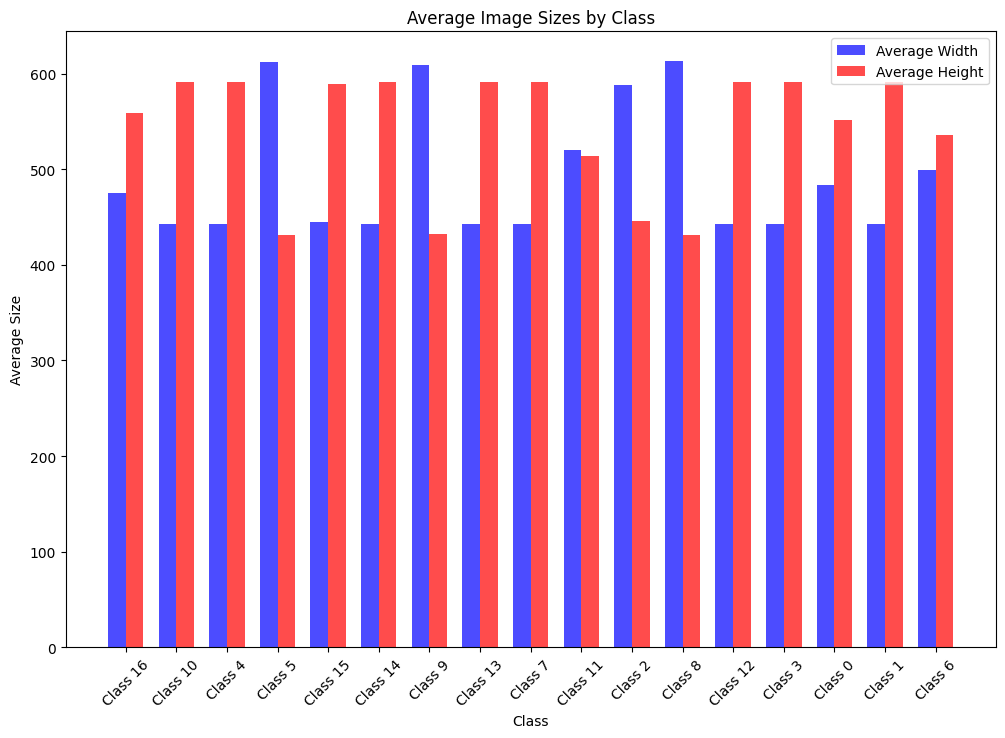

In [21]:
class_image_sizes = {}

for index, row in df.iterrows():
    image_path = os.path.join(image_path_prefix, row['ID'])
    image = Image.open(image_path)
    width, height = image.size
    target = row['target']
    if target not in class_image_sizes:
        class_image_sizes[target] = []
    class_image_sizes[target].append((width, height))

class_average_sizes = {}

for target, sizes in class_image_sizes.items():
    widths, heights = zip(*sizes)
    class_average_sizes[target] = (sum(widths) / len(widths), sum(heights) / len(heights))

plt.figure(figsize=(12, 8))

class_labels = [f"Class {target}" for target in class_average_sizes.keys()]
average_widths = [size[0] for size in class_average_sizes.values()]
average_heights = [size[1] for size in class_average_sizes.values()]

bar_width = 0.35
index = range(len(class_labels))

plt.bar(index, average_widths, bar_width, color='b', alpha=0.7, label='Average Width')
plt.bar([i + bar_width for i in index], average_heights, bar_width, color='r', alpha=0.7, label='Average Height')

plt.title('Average Image Sizes by Class')
plt.xlabel('Class')
plt.ylabel('Average Size')
plt.xticks([i + bar_width / 2 for i in index], class_labels, rotation=45)
plt.legend()
plt.show()

In [22]:
import numpy as np

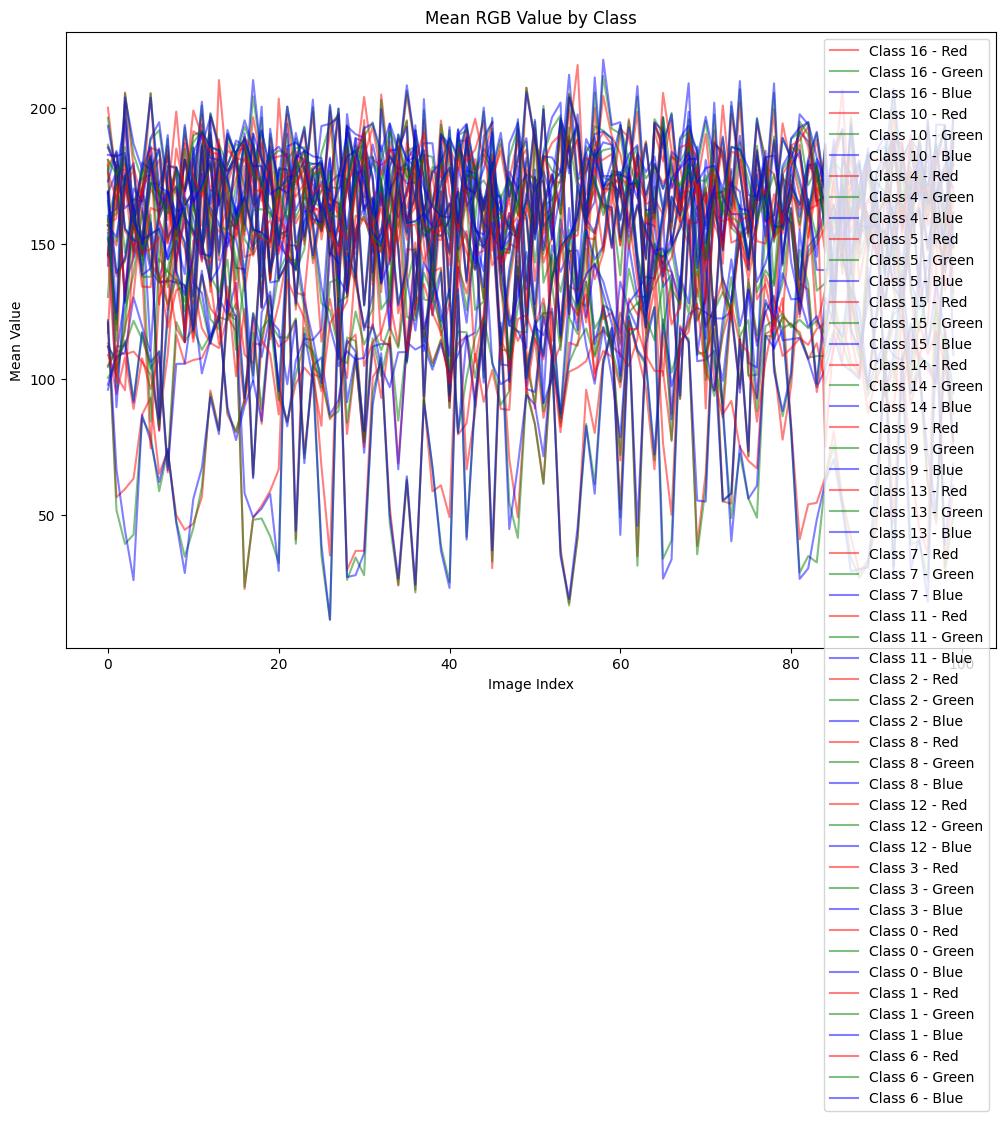

In [23]:
class_rgb_values = {}

for index, row in df.iterrows():
    image_path = os.path.join(image_path_prefix, row['ID'])
    image = Image.open(image_path)
    rgb_array = np.array(image)
    target = row['target']
    if target not in class_rgb_values:
        class_rgb_values[target] = []
    class_rgb_values[target].append(rgb_array)

plt.figure(figsize=(12, 8))

for target, rgb_arrays in class_rgb_values.items():
    r_means = [np.mean(rgb[:, :, 0]) for rgb in rgb_arrays]
    g_means = [np.mean(rgb[:, :, 1]) for rgb in rgb_arrays]
    b_means = [np.mean(rgb[:, :, 2]) for rgb in rgb_arrays]
    
    plt.plot(r_means, label=f'Class {target} - Red', color='red', alpha=0.5)
    plt.plot(g_means, label=f'Class {target} - Green', color='green', alpha=0.5)
    plt.plot(b_means, label=f'Class {target} - Blue', color='blue', alpha=0.5)

plt.title('Mean RGB Value by Class')
plt.xlabel('Image Index')
plt.ylabel('Mean Value')
plt.legend()
plt.show()

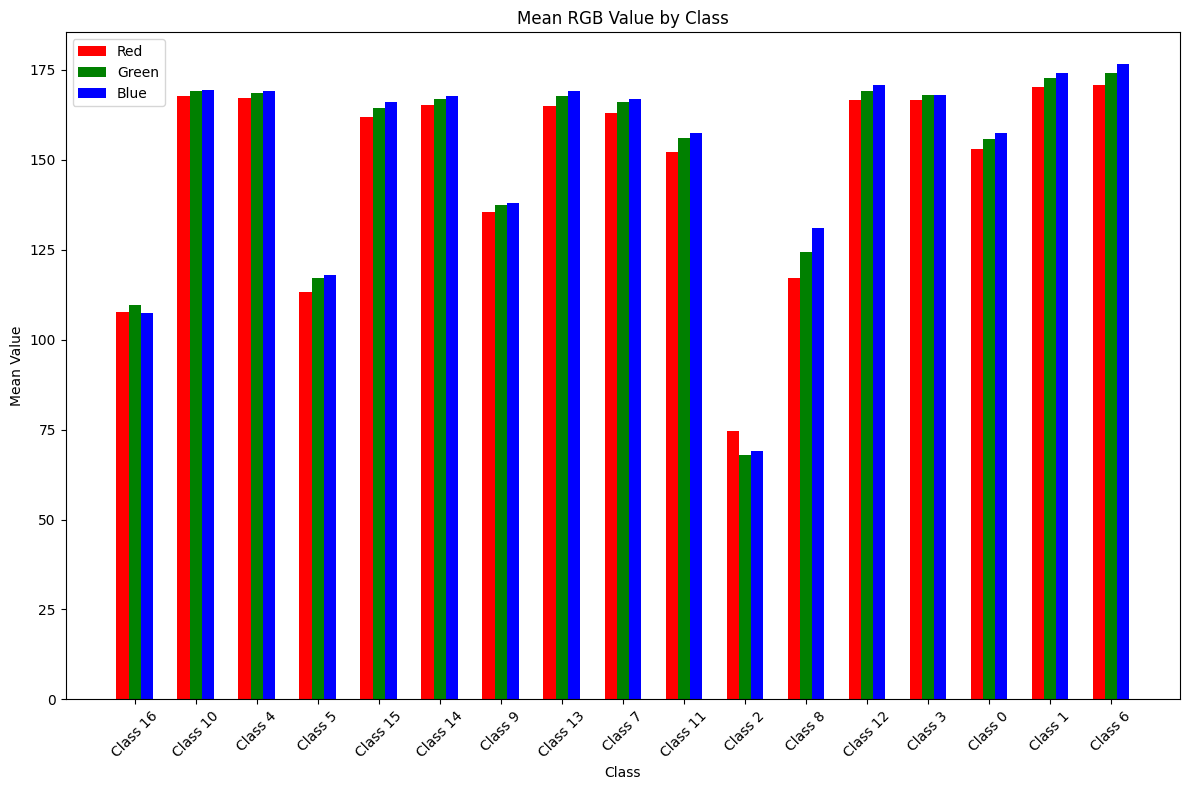

In [24]:
class_rgb_means = {}

for index, row in df.iterrows():
    image_path = os.path.join(image_path_prefix, row['ID'])
    image = Image.open(image_path)
    rgb_array = np.array(image)
    target = row['target']
    if target not in class_rgb_means:
        class_rgb_means[target] = []
    class_rgb_means[target].append(np.mean(rgb_array, axis=(0, 1)))

plt.figure(figsize=(12, 8))

class_labels = [f"Class {target}" for target in class_rgb_means.keys()]
r_means = [np.mean([rgb[0] for rgb in class_rgb_means[target]]) for target in class_rgb_means.keys()]
g_means = [np.mean([rgb[1] for rgb in class_rgb_means[target]]) for target in class_rgb_means.keys()]
b_means = [np.mean([rgb[2] for rgb in class_rgb_means[target]]) for target in class_rgb_means.keys()]

bar_width = 0.2
index = np.arange(len(class_labels))

plt.bar(index, r_means, bar_width, color='r', label='Red')
plt.bar(index + bar_width, g_means, bar_width, color='g', label='Green')
plt.bar(index + 2 * bar_width, b_means, bar_width, color='b', label='Blue')

plt.xlabel('Class')
plt.ylabel('Mean Value')
plt.title('Mean RGB Value by Class')
plt.xticks(index + bar_width, class_labels, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

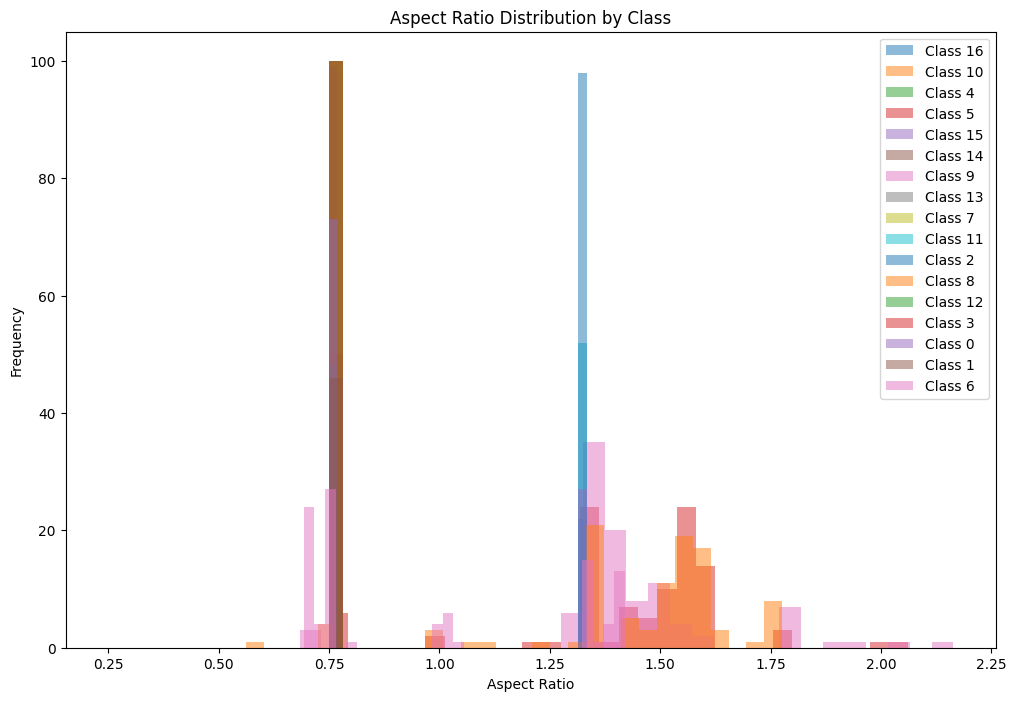

In [25]:
class_aspect_ratios = {}

for index, row in df.iterrows():
    image_path = os.path.join(image_path_prefix, row['ID'])
    image = Image.open(image_path)
    width, height = image.size
    aspect_ratio = width / height
    target = row['target']
    if target not in class_aspect_ratios:
        class_aspect_ratios[target] = []
    class_aspect_ratios[target].append(aspect_ratio)

plt.figure(figsize=(12, 8))

for target, aspect_ratios in class_aspect_ratios.items():
    plt.hist(aspect_ratios, bins=30, alpha=0.5, label=f'Class {target}')

plt.title('Aspect Ratio Distribution by Class')
plt.xlabel('Aspect Ratio')
plt.ylabel('Frequency')
plt.legend()
plt.show()